In [708]:
# 角速度の平面成分と加速度の平面成分を用いてZ軸を基準に原点で回転させることで歩行を補正する

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_fontja
import numpy as np
from scipy import signal

acce_file_path = './PDR_1/Accelerometer.csv'
gyro_file_path = './PDR_1/Gyroscope.csv'

acce_data = pd.read_csv(acce_file_path,names=['timestamp','x','y','z'], header=0)
gyro_data = pd.read_csv(gyro_file_path,names=['timestamp','x','y','z'], header=0)

# 2sから9sまでのデータに絞る
acce_data = acce_data[(acce_data['timestamp'] >= 2.0) & (acce_data['timestamp'] <= 9.0)]
gyro_data = gyro_data[(gyro_data['timestamp'] >= 2.0) & (gyro_data['timestamp'] <= 9.0)]
# indexをリセット
acce_data = acce_data.reset_index(drop=True)
gyro_data = gyro_data.reset_index(drop=True)

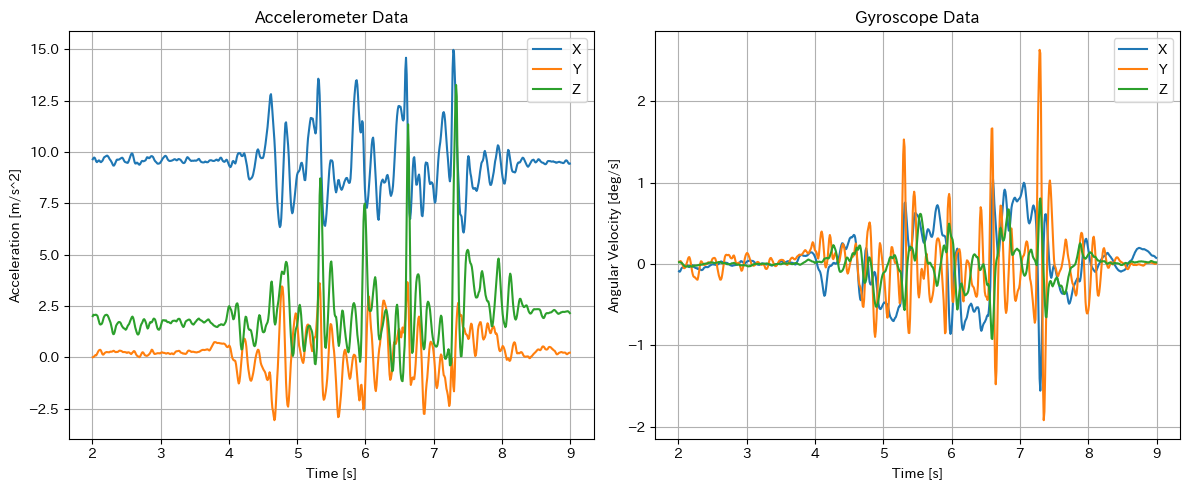

In [709]:
# 加速度と角速度のグラフを横に並べて表示
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 加速度
axes[0].plot(acce_data['timestamp'], acce_data['x'], label='X')
axes[0].plot(acce_data['timestamp'], acce_data['y'], label='Y')
axes[0].plot(acce_data['timestamp'], acce_data['z'], label='Z')
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Acceleration [m/s^2]')
axes[0].set_title('Accelerometer Data')
axes[0].legend()
axes[0].grid()

# 角速度
axes[1].plot(gyro_data['timestamp'], gyro_data['x'], label='X')
axes[1].plot(gyro_data['timestamp'], gyro_data['y'], label='Y')
axes[1].plot(gyro_data['timestamp'], gyro_data['z'], label='Z')
axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('Angular Velocity [deg/s]')
axes[1].set_title('Gyroscope Data')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

## 加速度

X軸は重力加速度方向を向いている
平面加速度成分は(Y,Z)

## 角速度

加速度の値より、角速度の平面成分はX軸である


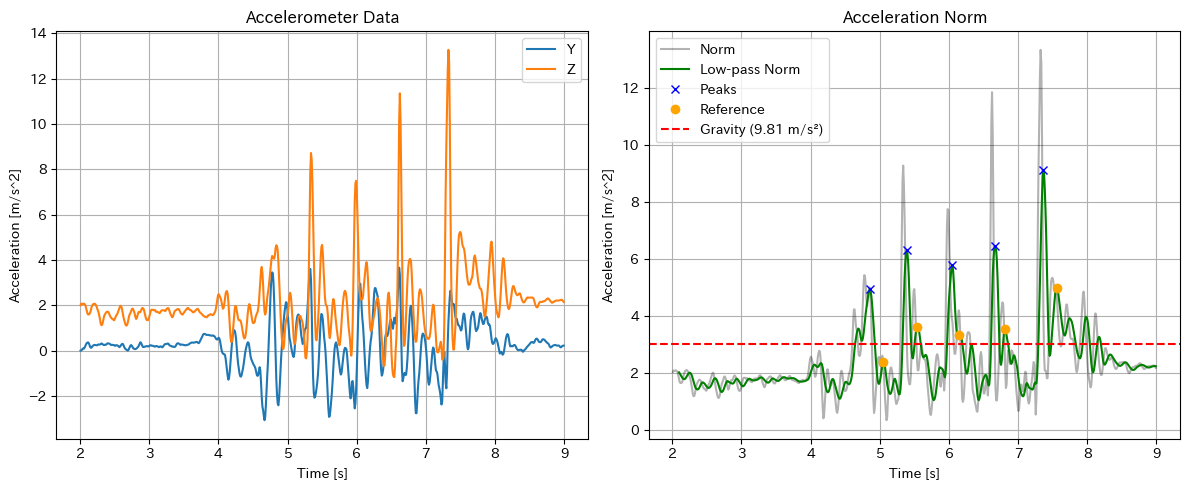

In [710]:
# ノルムの算出
acce_data['norm'] = np.sqrt(acce_data['y']**2 + acce_data['z']**2)
acce_data['low_norm'] = acce_data['norm'].rolling(window=10).mean()

peak,_ = signal.find_peaks(acce_data['low_norm'], height=4, distance=20)
gensoku_index = [303, 352, 413, 478, 554]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 加速度
axes[0].plot(acce_data['timestamp'], acce_data['y'], label='Y')
axes[0].plot(acce_data['timestamp'], acce_data['z'], label='Z')
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Acceleration [m/s^2]')
axes[0].set_title('Accelerometer Data')
axes[0].legend()
axes[0].grid()

# ノルム
axes[1].plot(acce_data['timestamp'], acce_data['norm'], label='Norm', color='black', alpha=0.3)
axes[1].plot(acce_data['timestamp'], acce_data['low_norm'], label='Low-pass Norm', color='green')
axes[1].plot(acce_data['timestamp'].iloc[peak], acce_data['low_norm'].iloc[peak], 'x', label='Peaks', color='blue')
axes[1].plot(acce_data['timestamp'].iloc[gensoku_index], acce_data['low_norm'].iloc[gensoku_index], 'o', label='Reference', color='orange')
axes[1].axhline(y=3.0, color='red', linestyle='--', label='Gravity (9.81 m/s²)')
axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('Acceleration [m/s^2]')
axes[1].set_title('Acceleration Norm')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

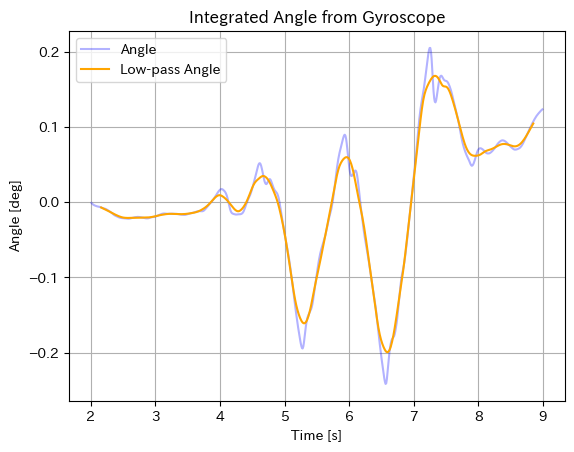

In [711]:
# 角速度の平面成分を積分して角度を求める
gyro_data['angle'] = np.cumsum(gyro_data['x']) / (len(gyro_data) / (gyro_data['timestamp'].iloc[-1] - gyro_data['timestamp'].iloc[0]))
gyro_data['low_angle'] = gyro_data['angle'].rolling(window=30, center=True).mean()

plt.plot(gyro_data['timestamp'], gyro_data['angle'], label='Angle', color='blue', alpha=0.3)
plt.plot(gyro_data['timestamp'], gyro_data['low_angle'], label='Low-pass Angle', color='orange')
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.title('Integrated Angle from Gyroscope')
plt.legend()
plt.grid()
plt.show()

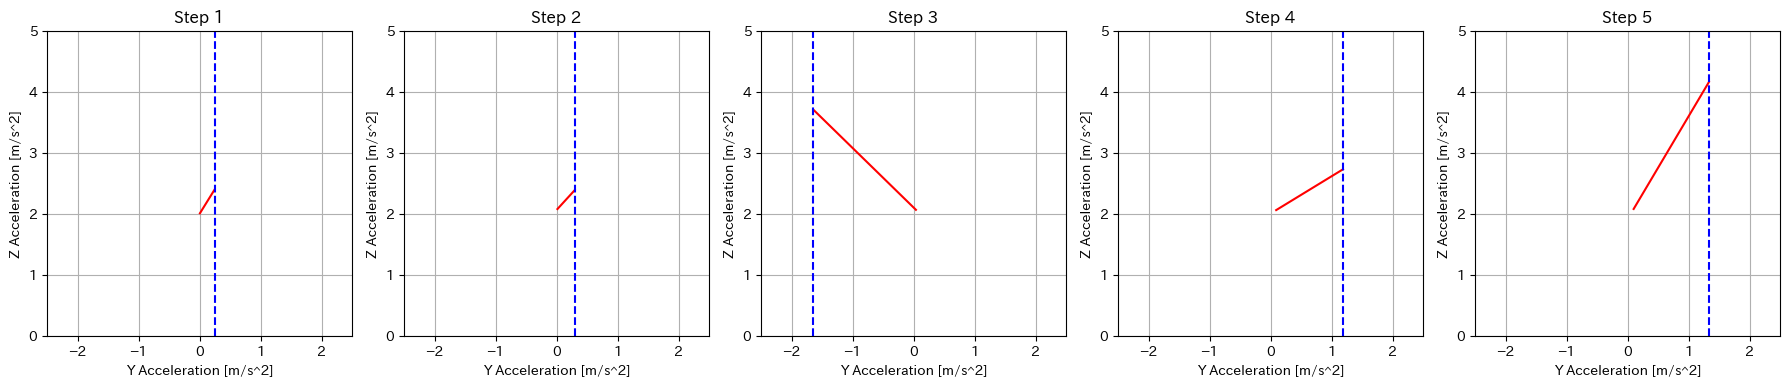

Peak 1: deg0.008620313081244942,rad0.0001504528458204617
Peak 2: deg-0.14515399823091035,rad-0.00253341519156341
Peak 3: deg0.04481909712498586,rad0.0007822408126021277
Peak 4: deg-0.18558347975399112,rad-0.003239042759015381
Peak 5: deg0.16639016588739064,rad0.0029040562376745193


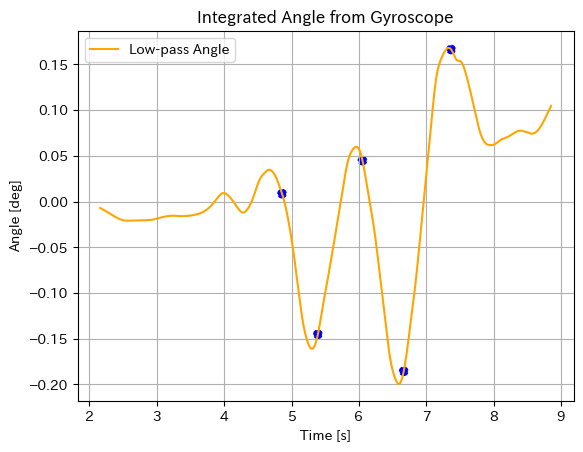

In [712]:
# 一歩ずつの加速度の方向をプロットする

fig, axes = plt.subplots(1,5,figsize=(18, 6))
for i in range(5):
	second_i = gensoku_index[i]
	# axes[i].quiver(acce_data['y'].iloc[i], acce_data['z'].iloc[i], acce_data['y'].iloc[second_i] - acce_data['y'].iloc[i], acce_data['z'].iloc[second_i] - acce_data['z'].iloc[i], angles='xy', scale_units='xy', scale=1, color='red')
	axes[i].plot([acce_data['y'].iloc[i], acce_data['y'].iloc[second_i]], [acce_data['z'].iloc[i], acce_data['z'].iloc[second_i]], color='red')
	axes[i].vlines(acce_data['y'].iloc[second_i], 0, 5, colors='blue', linestyles='dashed', label='Y=1')
	# z軸を基準に回転させる

	axes[i].set_xlim(-2.5, 2.5)
	axes[i].set_ylim(0, 5)
	axes[i].set_xlabel('Y Acceleration [m/s^2]')
	axes[i].set_ylabel('Z Acceleration [m/s^2]')
	axes[i].set_title(f'Step {i+1}')
	axes[i].grid()
	axes[i].set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

plt.plot(gyro_data['timestamp'], gyro_data['low_angle'], label='Low-pass Angle', color='orange')
for i in range(len(peak)):
	plt.scatter(gyro_data['timestamp'].iloc[peak[i]], gyro_data['low_angle'].iloc[peak[i]], color='blue', linestyle='dashed')
	print(f"Peak {i+1}: deg{gyro_data['low_angle'].iloc[peak[i]]},rad{np.deg2rad(gyro_data['low_angle'].iloc[peak[i]])}")
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.title('Integrated Angle from Gyroscope')
plt.legend()
plt.grid()
plt.show()

[0.00703805 2.00762409 0.        ] [0.24674797 2.39498243 0.        ]
[0.00985679 2.07696264 0.        ] [0.29362535 2.38903508 0.        ]
[0.04113263 2.0643256  0.        ] [-1.64053205  3.70847528  0.        ]
[0.08643391 2.06015726 0.        ] [1.17893743 2.73190989 0.        ]
[0.10647527 2.07767837 0.        ] [1.34699793 4.15565594 0.        ]


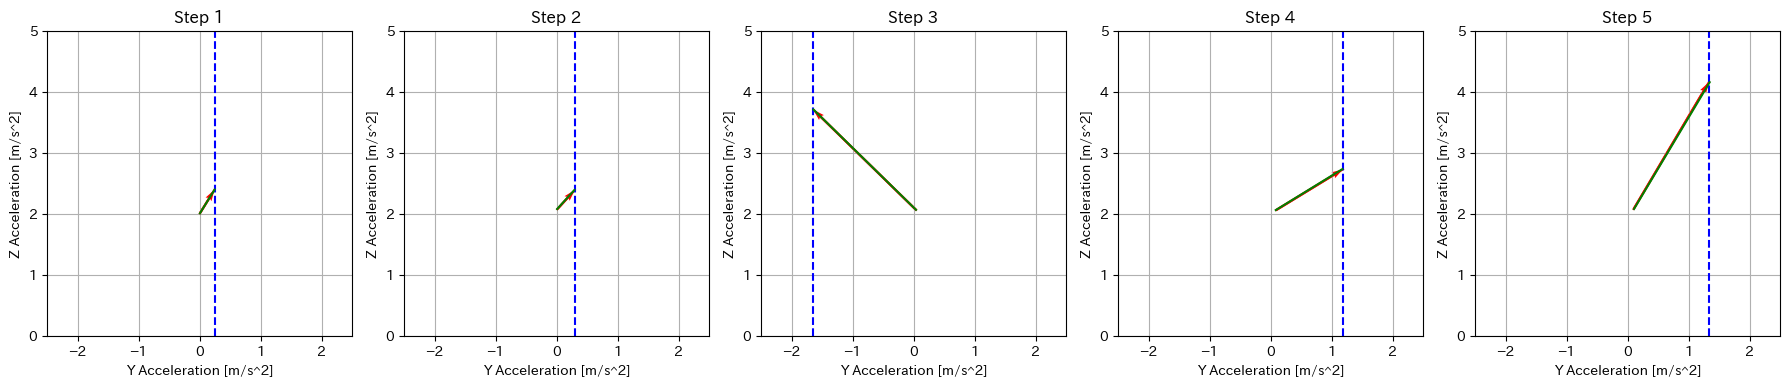

Peak 1: deg0.008620313081244942,rad0.0001504528458204617
Peak 2: deg-0.14515399823091035,rad-0.00253341519156341
Peak 3: deg0.04481909712498586,rad0.0007822408126021277
Peak 4: deg-0.18558347975399112,rad-0.003239042759015381
Peak 5: deg0.16639016588739064,rad0.0029040562376745193


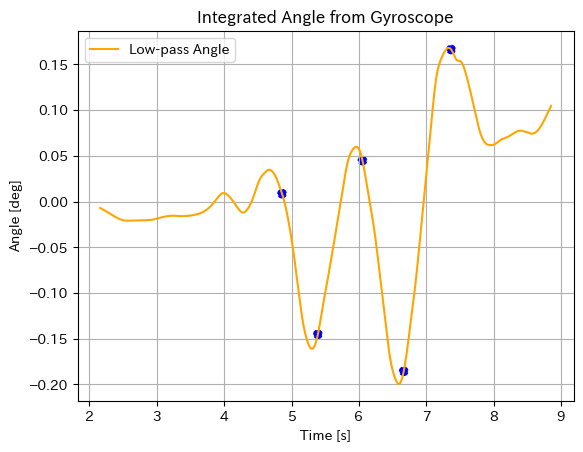

In [713]:
# 一歩ずつの加速度の方向をプロットする

fig, axes = plt.subplots(1,5,figsize=(18, 6))
for i in range(peak.shape[0]):
	second_i = gensoku_index[i]
	axes[i].quiver(acce_data['y'].iloc[i], acce_data['z'].iloc[i], acce_data['y'].iloc[second_i] - acce_data['y'].iloc[i], acce_data['z'].iloc[second_i] - acce_data['z'].iloc[i], angles='xy', scale_units='xy', scale=1, color='red')
	axes[i].plot([acce_data['y'].iloc[i], acce_data['y'].iloc[second_i]], [acce_data['z'].iloc[i], acce_data['z'].iloc[second_i]], color='red')
	axes[i].vlines(acce_data['y'].iloc[second_i], 0, 5, colors='blue', linestyles='dashed', label='Y=1')
	# z軸を基準に回転させる

	start = np.array([acce_data['y'].iloc[i], acce_data['z'].iloc[i], 0])
	end = np.array([acce_data['y'].iloc[second_i], acce_data['z'].iloc[second_i], 0])
	shift_mat = np.array([[np.cos(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), -np.sin(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), 0],
						  [np.sin(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])),  np.cos(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), 0],
						  [0, 0, 1]])
	shift_start = shift_mat @ start
	shift_end = shift_mat @ end
	print(shift_start, shift_end)
	axes[i].plot([shift_start[0], shift_end[0]], [shift_start[1], shift_end[1]], color='green')

	axes[i].set_xlim(-2.5, 2.5)
	axes[i].set_ylim(0, 5)
	# axes[i].set_xlim(-5, 5)
	# axes[i].set_ylim(-5, 5)
	axes[i].set_xlabel('Y Acceleration [m/s^2]')
	axes[i].set_ylabel('Z Acceleration [m/s^2]')
	axes[i].set_title(f'Step {i+1}')
	axes[i].grid()
	axes[i].set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

plt.plot(gyro_data['timestamp'], gyro_data['low_angle'], label='Low-pass Angle', color='orange')
for i in range(len(peak)):
	plt.scatter(gyro_data['timestamp'].iloc[peak[i]], gyro_data['low_angle'].iloc[peak[i]], color='blue', linestyle='dashed')
	print(f"Peak {i+1}: deg{gyro_data['low_angle'].iloc[peak[i]]},rad{np.deg2rad(gyro_data['low_angle'].iloc[peak[i]])}")
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.title('Integrated Angle from Gyroscope')
plt.legend()
plt.grid()
plt.show()

[0.00703805 2.00762409 0.        ] [0.24674797 2.39498243 0.        ]
Step 1: rad-0.5541519395403685, deg-31.750567344651877
[0.00985679 2.07696264 0.        ] [0.29362535 2.38903508 0.        ]
Step 2: rad-0.737931435833096, deg-42.280356843265324
[0.04113263 2.0643256  0.        ] [-1.64053205  3.70847528  0.        ]
Step 3: rad0.7966776294887445, deg45.6462658021922
[0.08643391 2.06015726 0.        ] [1.17893743 2.73190989 0.        ]
Step 4: rad-1.01951137301844, deg-58.41369883954436
[0.10647527 2.07767837 0.        ] [1.34699793 4.15565594 0.        ]
Step 5: rad-0.538200074421638, deg-30.83659279798667


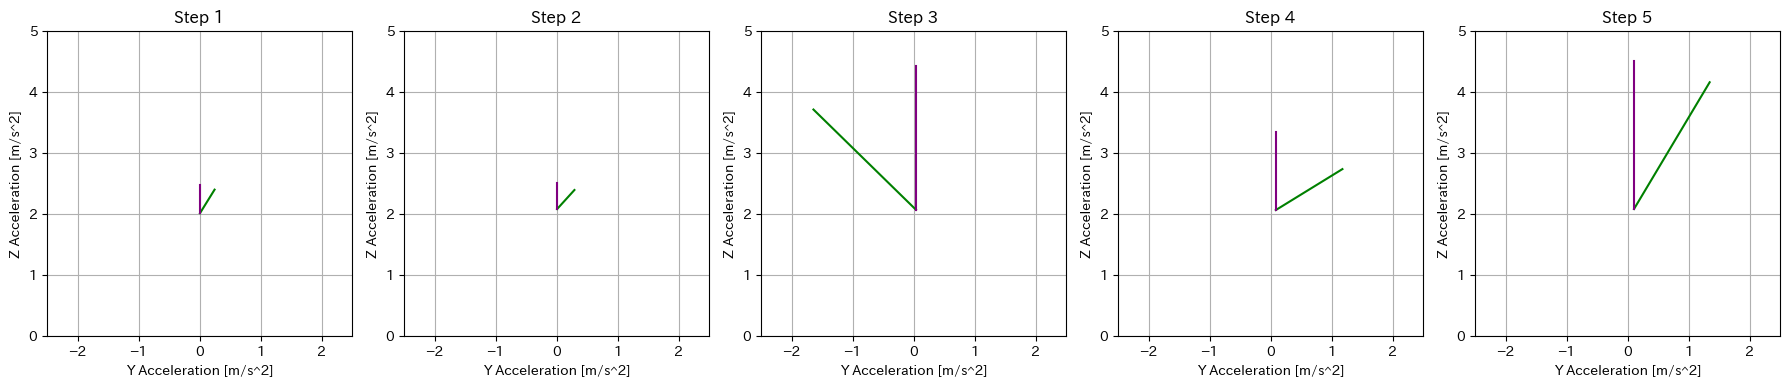

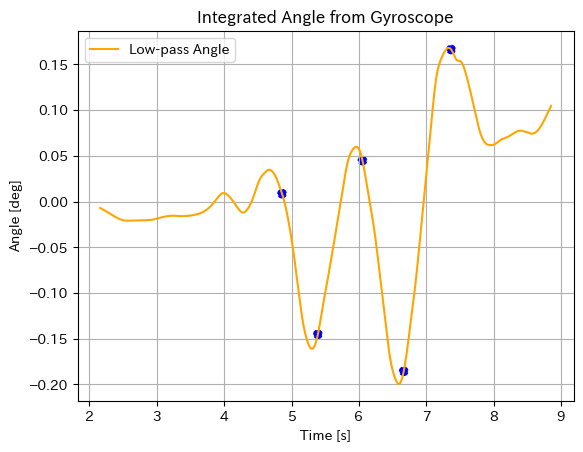

In [714]:
# 一歩ずつの加速度の方向をプロットする

fig, axes = plt.subplots(1,5,figsize=(18, 6))
for i in range(peak.shape[0]):
	second_i = gensoku_index[i]
	# axes[i].quiver(acce_data['y'].iloc[i], acce_data['z'].iloc[i], acce_data['y'].iloc[second_i] - acce_data['y'].iloc[i], acce_data['z'].iloc[second_i] - acce_data['z'].iloc[i], angles='xy', scale_units='xy', scale=1, color='red')
	# axes[i].plot([acce_data['y'].iloc[i], acce_data['y'].iloc[second_i]], [acce_data['z'].iloc[i], acce_data['z'].iloc[second_i]], color='red')
	# axes[i].vlines(acce_data['y'].iloc[second_i], 0, 5, colors='blue', linestyles='dashed', label='Y=1')
	# z軸を基準に回転させる

	start = np.array([acce_data['y'].iloc[i], acce_data['z'].iloc[i], 0])
	end = np.array([acce_data['y'].iloc[second_i], acce_data['z'].iloc[second_i], 0])
	shift_mat = np.array([[np.cos(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), -np.sin(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), 0],
						  [np.sin(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])),  np.cos(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), 0],
						  [0, 0, 1]])
	shift_start = shift_mat @ start
	shift_end = shift_mat @ end
	axes[i].plot([shift_start[0], shift_end[0]], [shift_start[1], shift_end[1]], color='green')
	print(shift_start, shift_end)

	rad_angle = np.arctan2(shift_end[1] - shift_start[1], shift_end[0] - shift_start[0]) - np.pi/2
	print(f"Step {i+1}: rad{rad_angle}, deg{np.rad2deg(rad_angle)}")

	
	# startを原点にしてendをrad_angleだけ回転させる
	rotated_end = np.array([shift_start[0] + (shift_end[0] - shift_start[0]) * np.cos(-rad_angle) - (shift_end[1] - shift_start[1]) * np.sin(-rad_angle),
							shift_start[1] + (shift_end[0] - shift_start[0]) * np.sin(-rad_angle) + (shift_end[1] - shift_start[1]) * np.cos(-rad_angle),
							0])
	axes[i].plot([shift_start[0], rotated_end[0]], [shift_start[1], rotated_end[1]], color='purple')

	axes[i].set_xlim(-2.5, 2.5)
	axes[i].set_ylim(0, 5)
	axes[i].set_xlabel('Y Acceleration [m/s^2]')
	axes[i].set_ylabel('Z Acceleration [m/s^2]')
	axes[i].set_title(f'Step {i+1}')
	axes[i].grid()
	axes[i].set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

plt.plot(gyro_data['timestamp'], gyro_data['low_angle'], label='Low-pass Angle', color='orange')
for i in range(len(peak)):
	plt.scatter(gyro_data['timestamp'].iloc[peak[i]], gyro_data['low_angle'].iloc[peak[i]], color='blue', linestyle='dashed')
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.title('Integrated Angle from Gyroscope')
plt.legend()
plt.grid()
plt.show()

Step 1: deg-31.750567344651877, rad-0.5541519395403685
Step 2: deg-42.280356843265324, rad-0.737931435833096
Step 3: deg45.6462658021922, rad0.7966776294887445
Step 4: deg-58.41369883954436, rad-1.01951137301844
Step 5: deg-30.83659279798667, rad-0.538200074421638


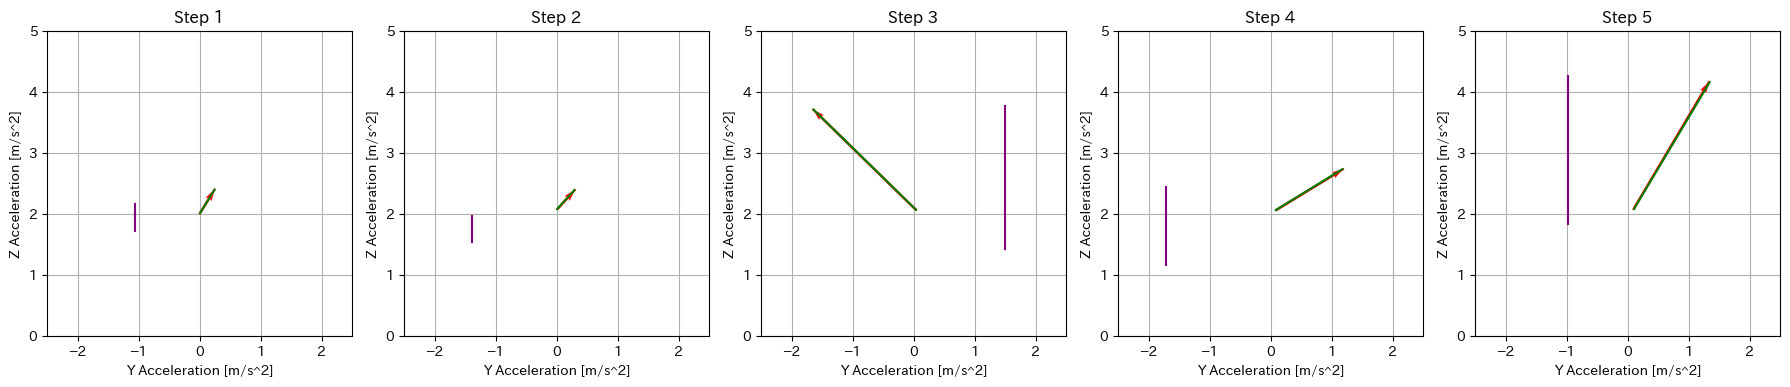

In [715]:
# 一歩ずつの加速度の方向をプロットする

fig, axes = plt.subplots(1,5,figsize=(18, 6))
rad_angle_list = []
for i in range(peak.shape[0]):
	second_i = gensoku_index[i]
	axes[i].quiver(acce_data['y'].iloc[i], acce_data['z'].iloc[i], acce_data['y'].iloc[second_i] - acce_data['y'].iloc[i], acce_data['z'].iloc[second_i] - acce_data['z'].iloc[i], angles='xy', scale_units='xy', scale=1, color='red')
	axes[i].plot([acce_data['y'].iloc[i], acce_data['y'].iloc[second_i]], [acce_data['z'].iloc[i], acce_data['z'].iloc[second_i]], color='red')
	# axes[i].vlines(acce_data['y'].iloc[second_i], 0, 5, colors='blue', linestyles='dashed', label='Y=1')

	start = np.array([acce_data['y'].iloc[i], acce_data['z'].iloc[i], 0])
	end = np.array([acce_data['y'].iloc[second_i], acce_data['z'].iloc[second_i], 0])
	shift_mat = np.array([[np.cos(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), -np.sin(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), 0],
						  [np.sin(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])),  np.cos(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), 0],
						  [0, 0, 1]])
	shift_start = shift_mat @ start
	shift_end = shift_mat @ end
	axes[i].plot([shift_start[0], shift_end[0]], [shift_start[1], shift_end[1]], color='green')

	# y軸に直行するように回転させる
	rad_angle = np.arctan2(shift_end[1] - shift_start[1], shift_end[0] - shift_start[0]) - np.pi/2
	# rad_angle = np.arctan2(shift_end[1] - shift_start[1], shift_end[0] - shift_start[0])
	rad_angle_list.append(rad_angle)
	print(f"Step {i+1}: deg{np.rad2deg(rad_angle)}, rad{rad_angle}")
	shift_rad_angle_mat = np.array([[np.cos(-rad_angle), -np.sin(-rad_angle), 0],
									[np.sin(-rad_angle),  np.cos(-rad_angle), 0],
									[0, 0, 1]])
	shift_rad_angle_start = shift_rad_angle_mat @ shift_start
	shift_rad_angle_end = shift_rad_angle_mat @ shift_end
	axes[i].plot([shift_rad_angle_start[0], shift_rad_angle_end[0]], [shift_rad_angle_start[1], shift_rad_angle_end[1]], color='purple')

	axes[i].set_xlim(-2.5, 2.5)
	axes[i].set_ylim(0, 5)
	# axes[i].set_xlim(-5, 5)
	# axes[i].set_ylim(-5, 5)
	axes[i].set_xlabel('Y Acceleration [m/s^2]')
	axes[i].set_ylabel('Z Acceleration [m/s^2]')
	axes[i].set_title(f'Step {i+1}')
	axes[i].grid()
	axes[i].set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

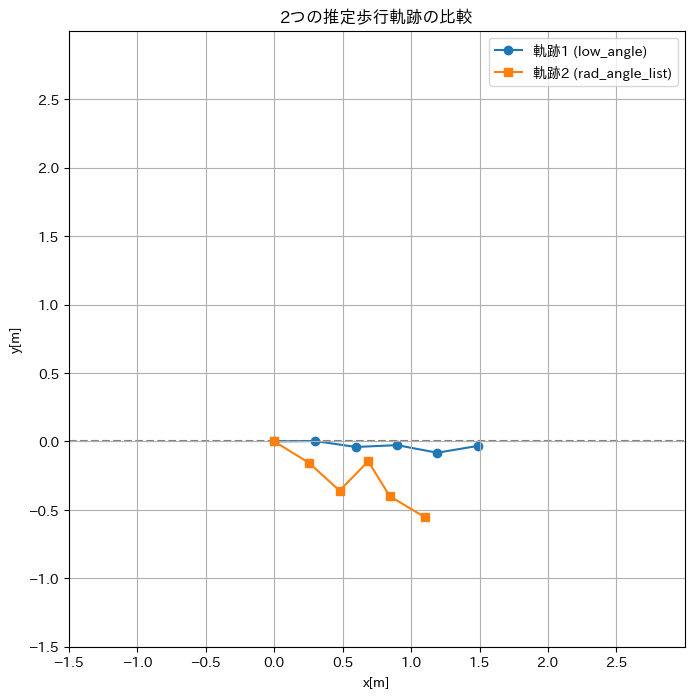

In [716]:
step = 0.3
point = [[0, 0]]
point_only_pdr = [[0, 0]]

# ステップから歩行軌跡を計算(rad_angle_list)
for p in range(len(peak)):
    # 軌跡1: gyro_data['low_angle'] を使用
    x1 = step * np.cos(gyro_data['low_angle'][peak[p]]) + point[-1][0]
    y1 = step * np.sin(gyro_data['low_angle'][peak[p]]) + point[-1][1]
    point.append([x1, y1])
    
    # 軌跡2: rad_angle_list を使用
    x2 = step * np.cos(rad_angle_list[p]) + point_only_pdr[-1][0]
    y2 = step * np.sin(rad_angle_list[p]) + point_only_pdr[-1][1]
    point_only_pdr.append([x2, y2])

# 2つの軌跡をそれぞれDataFrameに変換
point = pd.DataFrame(data=point, columns=['x', 'y'])
point_only_pdr = pd.DataFrame(data=point_only_pdr, columns=['x', 'y'])

# 2つの軌跡の始点を(0,0)に補正
point['x'] = point['x'] - point['x'][0]
point['y'] = point['y'] - point['y'][0]
point_only_pdr['x'] = point_only_pdr['x'] - point_only_pdr['x'][0]
point_only_pdr['y'] = point_only_pdr['y'] - point_only_pdr['y'][0]


# --- 描画 ---
size = ((-1.5, 3.0), (-1.5,3.0))
plt.figure(figsize=(10, 8)) # グラフサイズを少し大きく

# ★★★ 2つの軌跡をプロット ★★★
plt.plot(point['x'], point['y'], 'o-', label='軌跡1 (low_angle)', zorder=1)
plt.plot(point_only_pdr['x'], point_only_pdr['y'], 's-', label='軌跡2 (rad_angle_list)', zorder=2)


# 軸を揃える
plt.gca().set_aspect('equal', adjustable='box')

plt.title('2つの推定歩行軌跡の比較')
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.xticks(np.arange(size[0][0], size[0][1], 0.5))
plt.yticks(np.arange(size[1][0], size[1][1], 0.5))
plt.hlines(0, size[0][0], size[0][1], colors='gray', linestyles='--', zorder=0)
plt.xlim(size[0][0], size[0][1])
plt.ylim(size[1][0], size[1][1])

plt.grid()
plt.legend() # 凡例を表示
plt.show()